# A.4. Solutions

## Fixed Income Module

### DRW New-Hire Learning Program

#### Summer 2022

Questions?
* Contact: Mark Hendricks
* hendricks@uchicago.edu


### Instructions

* Work on this in your group.
* Don't spend more than 45 minutes on it during the 12-2pm break. (We want you to have time refresh and eat.)
* We encourage you to do more on the problems in the afternoon/evening if able and interested.

In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,6)
plt.rcParams['font.size'] = 15
plt.rcParams['legend.fontsize'] = 13

from matplotlib.ticker import (MultipleLocator,
                               FormatStrFormatter,
                               AutoMinorLocator)
import sys
sys.path.insert(0, '../cmds')
from treasury_cmds import *

# 1 Forwards

Use the treasury issues in `'../data/selected_treasury_rates.xlsx.xlsx`. 

The selected treasuries are at nearly six-month intervals. Approximate that they mature at perfect 6-month intervals. (We are looking at them from the perspective of March 31, 2022.)

## 1.1 
Bootstrap the discount factor. Plot the answer in terms of discount factors and discount rates.

## 1.2
Use the discount factors to calculate the forward rate from $T_1=2$ to $T_2=2.5$.

Do the same for $T_1=5$ to $T_2=5.5$.

## 1.3
Explain how an FRA between $T_1$ and $T_2$ would function. How is the rate calculated above involved?

## 1.4
Calculate the entire forward curve for rates from $T$ to $T+0.5$, ranging $T$ from 0.5 through 6.5.

Plot the forward discount curve.

# <span style="color:red">Solution 1</span>

In [13]:
filepath = '../data/selected_treasury_rates.xlsx'
quotes = pd.read_excel(filepath, sheet_name='data').set_index('KYTREASNO')
quotes

,issue date,maturity date,maturity,coupon rate,price,ytm
KYTREASNO,,,,,,
206896,2015-09-30,2022-09-30,0.501027,1.750,100.363281,0.010144
207688,2021-03-31,2023-03-31,0.999316,0.125,98.457031,0.016804
207775,2021-09-30,2023-09-30,1.500342,0.250,97.218750,0.021307
207077,2017-03-31,2024-03-31,2.001369,2.125,99.570312,0.023294
207416,2019-09-30,2024-09-30,2.502396,1.500,97.621094,0.024680
207507,2020-03-31,2025-03-31,3.000684,0.500,94.175781,0.025101
207256,2018-09-30,2025-09-30,3.501711,3.000,101.554688,0.025142
207337,2019-03-31,2026-03-31,4.000000,2.250,98.929688,0.025154
207777,2021-09-30,2026-09-30,4.501027,0.875,93.042969,0.025020


In [45]:
QUOTE_DATE = '2022-03-31'
t_date = pd.to_datetime(QUOTE_DATE)


CF = pd.DataFrame(data=0, index=quotes.index, columns=quotes['maturity date'])

for i in quotes.index:
    coupon_dates = get_coupon_dates(t_date,pd.to_datetime(quotes.loc[i,'maturity date']))

    if coupon_dates is not None:
        CF.loc[i,coupon_dates] = quotes.loc[i,'coupon rate']/2

    CF.loc[i,quotes.loc[i,'maturity date']] += 100

CF = CF.resample('m',axis=1).sum()
CF.drop(columns=CF.columns[(CF==0).all()],inplace=True)
CF = CF.fillna(0).sort_index(axis=1)
CF

maturity date,2022-09-30,2023-03-31,2023-09-30,2024-03-31,2024-09-30,2025-03-31,2025-09-30,2026-03-31,2026-09-30,2027-03-31,2027-09-30,2028-03-31,2028-09-30,2029-03-31
KYTREASNO,,,,,,,,,,,,,,
206896,100.8750,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
207688,0.0625,100.0625,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
207775,0.1250,0.1250,100.1250,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
207077,1.0625,1.0625,1.0625,101.0625,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
207416,0.7500,0.7500,0.7500,0.7500,100.7500,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
207507,0.2500,0.2500,0.2500,0.2500,0.2500,100.2500,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
207256,1.5000,1.5000,1.5000,1.5000,1.5000,1.5000,101.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
207337,1.1250,1.1250,1.1250,1.1250,1.1250,1.1250,1.1250,101.1250,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
207777,0.4375,0.4375,0.4375,0.4375,0.4375,0.4375,0.4375,0.4375,100.4375,0.0000,0.0000,0.0000,0.0000,0.0000


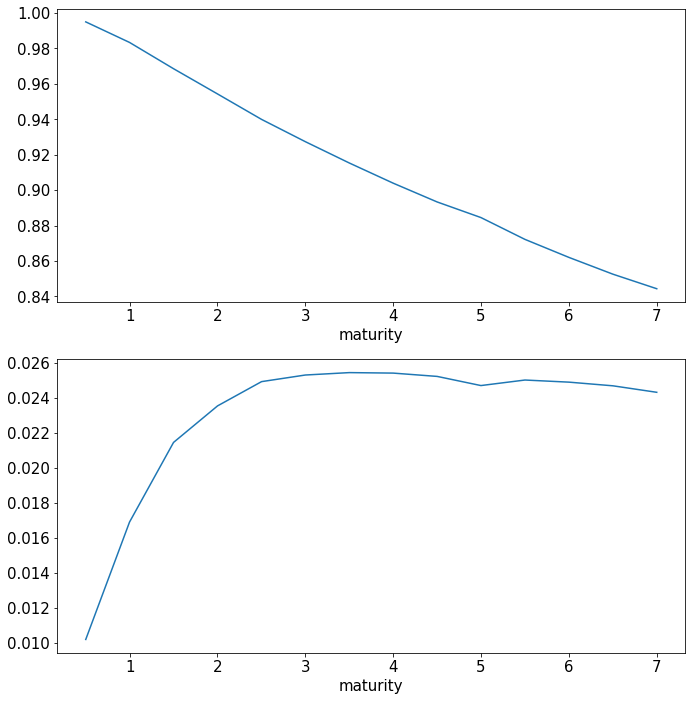

In [58]:
COMPOUNDING = 2
spot = pd.DataFrame(np.linalg.solve(CF,quotes['price'].loc[CF.index]), index=CF.index, columns=['discount factor'])
spot.insert(0,'maturity',quotes['maturity'])
spot = spot.reset_index().set_index('maturity')
spot['rate'] = discount_to_intrate(spot['discount factor'], spot.index,n_compound=COMPOUNDING)

fig, ax = plt.subplots(2,1,figsize=(10,10))
spot['discount factor'].plot(ax=ax[0],title='discount factor')
spot['rate'].plot(ax=ax[1],title='rate')
plt.tight_layout()
plt.show()

## 1.4

Answer to 1.2-1.3 below.

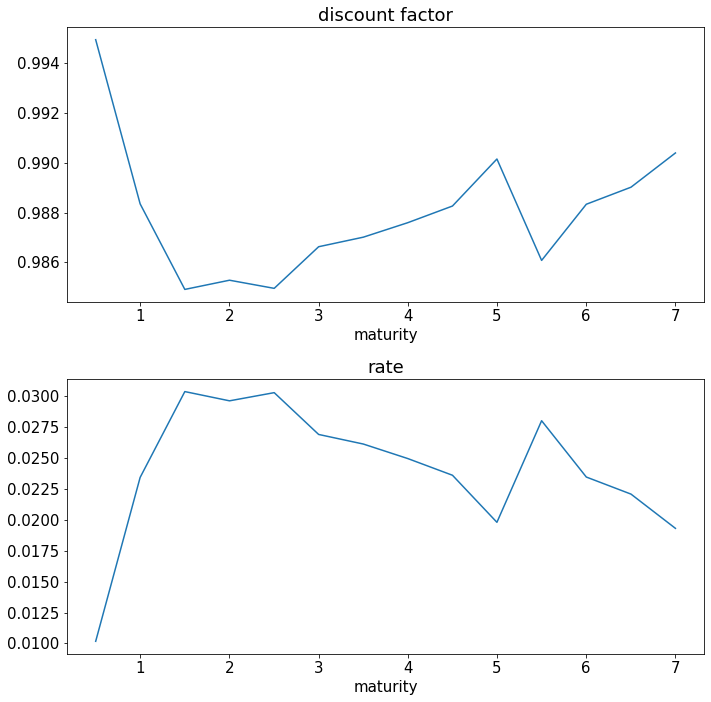

In [70]:
forward = pd.DataFrame(spot['discount factor']/spot['discount factor'].shift(),index=spot.index, columns=['discount factor'])
forward['discount factor'].iloc[0] = spot['discount factor'].iloc[0]
forward['rate'] = -np.log(forward['discount factor']) / forward.index.to_series().diff().mean()

fig, ax = plt.subplots(2,1,figsize=(10,10))
forward['discount factor'].plot(ax=ax[0],title='discount factor')
forward['rate'].plot(ax=ax[1],title='rate')
plt.tight_layout()
plt.show()

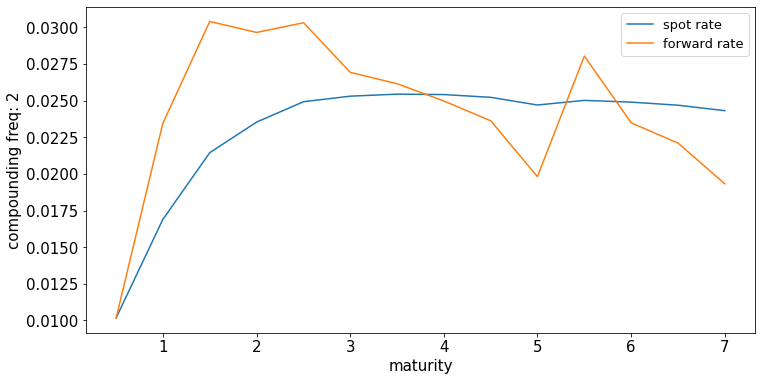

In [77]:
fig, ax = plt.subplots()
spot['rate'].plot(ax=ax)
forward['rate'].plot(ax=ax)
plt.legend(['spot rate','forward rate'])
plt.ylabel(f'compounding freq: {COMPOUNDING}')
plt.show()

## 1.2

In [83]:
T2list = [2.5,5.5]
for T2 in T2list:
    forwardrate = forward['rate'].iloc[int(T2*2)]
    print(f'The Forward Rate at {T2-.5} to {T2} is {forwardrate:.2%}')

The Forward Rate at 2.0 to 2.5 is 2.69%
The Forward Rate at 5.0 to 5.5 is 2.35%


## 1.3

The FRA would have contract parameters for...
* the notional amount
* the dates $T_1$ and $T_2$
* the floating rate index that will be paid to the counterparty, $index$

Given that, the counterparties would agree on a forward rate for the exchange of the payment,
$$N\kappa[r_n(T_1,T_2)-f_n(t,T_1,T_2)]$$
where
* $\kappa$ is the fraction of year covered by $T_2-T_1$.
* $N$ is the notional amount.

This fixed forward rate, $f_n(t,T_1,T_2)$ is what is calculated above. 

All the rates above assume $T_2 = T_1 + 0.5$.

# 2 Floating rates

## 2.1
Use the data in `data/ref_rates.xlsx` to explore several key rates that are used as benchmarks for floating rates.
* SOFR
* Fed funds
* 3-month T-bill yield

Calculate the correlation between the three rates (filtering to the dates for which they all have reported values.)

Do this correlation analysis for the data in
* levels (as provided)
* differences (day-over-day changes)

## 2.2

Consider the 7-year treasury listed in problem 1. Suppose that both its YTM and coupon rate go up by 0.5\%. 
* What is the revised price of this Treasury?
* Is this a surprise?

# <span style="color:red">Solution 2</span>

## 2.1

In [6]:
filepath = '../data/ref_rates.xlsx'
refs = pd.read_excel(filepath, sheet_name='data').set_index('date')

In [9]:
refs.corr()

,DTB3,DFF,SOFR
DTB3,1.000000,0.988042,0.982199
DFF,0.988042,1.000000,0.994842
SOFR,0.982199,0.994842,1.000000


In [10]:
refs.diff().corr()

,DTB3,DFF,SOFR
DTB3,1.000000,0.158403,0.108907
DFF,0.158403,1.000000,0.305339
SOFR,0.108907,0.305339,1.000000


## 2.2

In [95]:
rADJ = .005
CFadj = CF + rADJ/2 * 100 * (CF>0)
discadj = spot['rate'] + rADJ

In [112]:
spot['discount adjusted'] = intrate_to_discount(discadj,discadj.index,n_compound=COMPOUNDING)

pxadj = (CFadj @ spot[['discount adjusted']].values).rename(columns={0:'price adjusted'})
px = quotes['price'].loc[pxadj.index]
price_comp = pd.concat([px,pxadj],axis=1)
price_comp

,price,price adjusted
KYTREASNO,,
206896,100.363281,100.361865
207688,98.457031,98.463895
207775,97.218750,97.234717
207077,99.570312,99.576253
207416,97.621094,97.642964
207507,94.175781,94.231194
207256,101.554688,101.545481
207337,98.929688,98.947822
207777,93.042969,93.131971


### The revised price is nearly the exact same!

This illustrates the key point of a floating-rate note (bond):
* The change in interest rate impacts the discount AND the coupon.
* These two effects are *nearly* offsetting.